# Some pandas 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns

## DA task
### NY ubers abs 
Some of the basic tasks with initial data analysis 
- Any NaNs?
- Are the significant outliers? 
- Repetitions? 
- Anything counterintuitive? 

In [2]:
!wget  -O 'train.csv' -q 'https://www.dropbox.com/s/en5f9nhn915cnkf/_train.csv?dl=0'

In [3]:
train = pd.read_csv('train.csv')
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
train.shape

(1458644, 11)

In [5]:
print("Id is unique") if train.id.nunique() == train.shape[0] else print("Id is not unique")

Id is unique


In [6]:
print("No missing values") if train.count().min() == train.shape[0] else print("Id is not unique")

No missing values


In [7]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Pandas is thinking that dates columns are object types, lets convert them to datetime object for future utility purpose and also check trip duration 


In [8]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime) #converting to dt 
train.loc[:, 'pickup_date'] = train['pickup_datetime'].dt.date  #assigning day 

train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime) #converting to dt 

train['store_and_fwd_flag'] = 1 * (train.store_and_fwd_flag.values == 'Y')
train['check_trip_duration'] = (train['dropoff_datetime'] - train['pickup_datetime']).map(lambda x: x.total_seconds())
duration_difference = train[np.abs(train['check_trip_duration'].values  - train['trip_duration'].values) > 1]
print('Trip_duration and datetimes are ok.') if len(duration_difference[['pickup_datetime', 'dropoff_datetime', 'trip_duration', 'check_trip_duration']]) == 0 else print('Ooops.')

Trip_duration and datetimes are ok.


In [9]:
train.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag              int64
trip_duration                   int64
pickup_date                    object
check_trip_duration           float64
dtype: object

In [10]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26,435.0


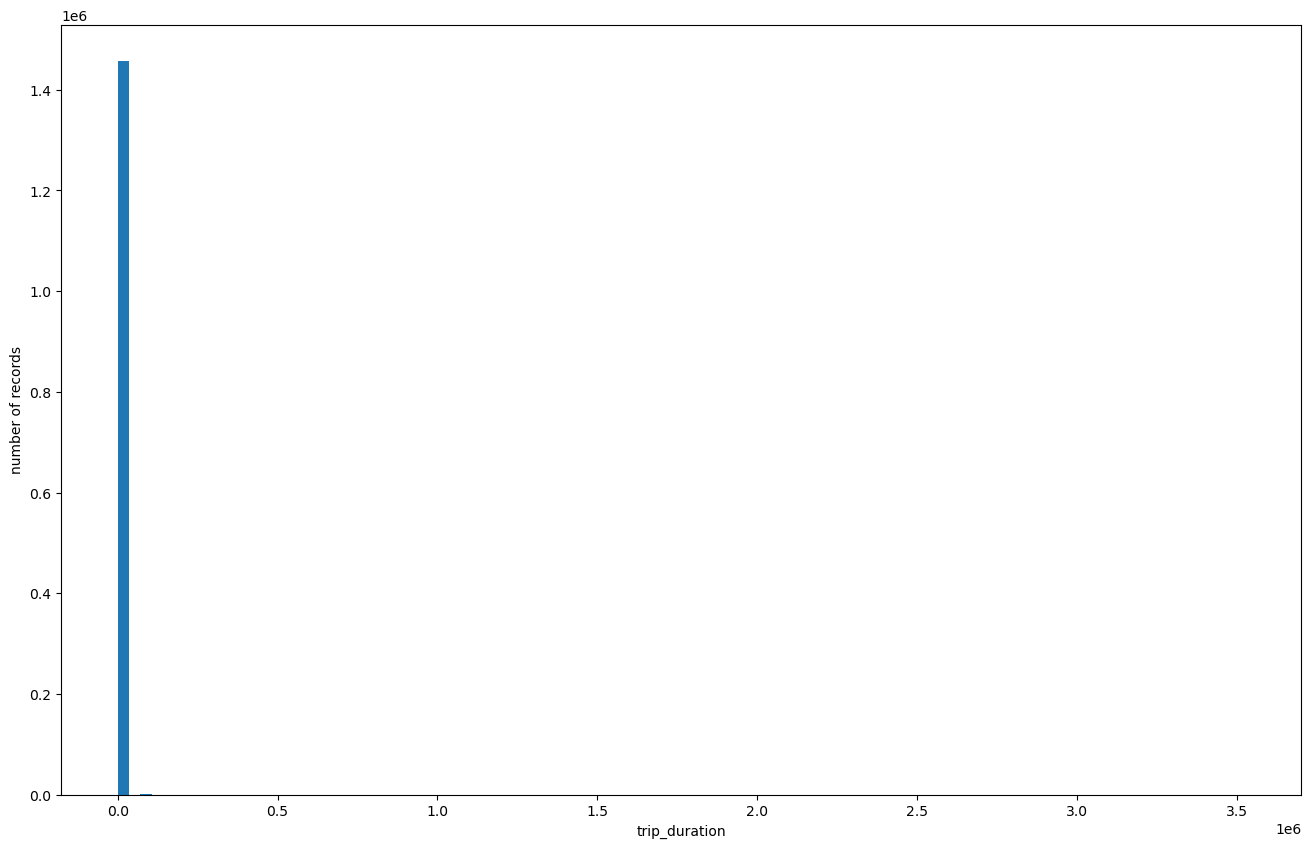

<Figure size 1200x800 with 0 Axes>

In [12]:
#lets graph the Y param 
plt.hist(train.trip_duration.values, bins = 100)
plt.xlabel('trip_duration')
plt.ylabel('number of records')
plt.figure(figsize = [12, 8])
plt.show()

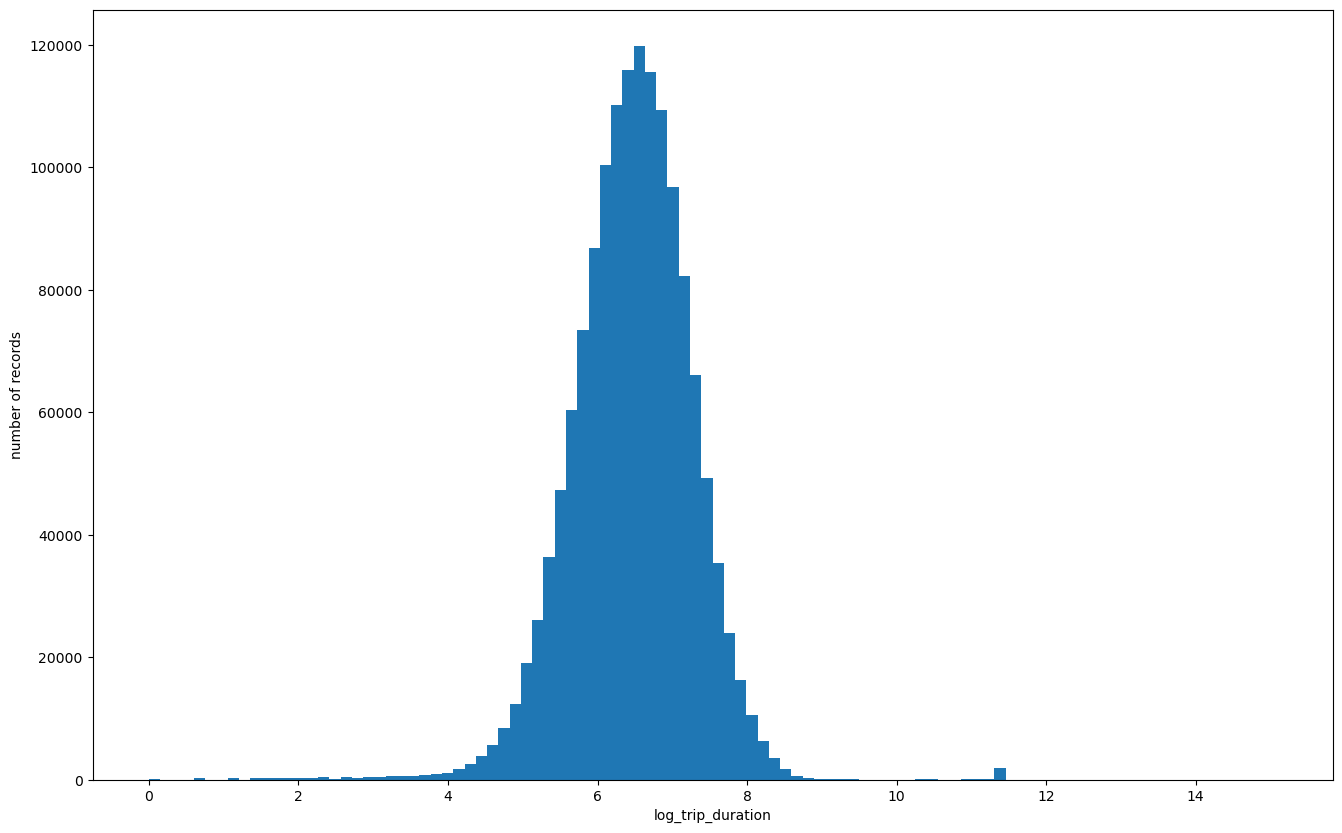

In [13]:
#graph turned out to be absolutely uninfoirmative so lets enchance it
train["log_trip_duration"] = np.log(train['trip_duration'].values)
plt.hist(train['log_trip_duration'].values, bins = 100)
plt.xlabel('log_trip_duration')
plt.ylabel('number of records')
plt.show()

Now the graph looks much better, the distibution seems to be resonable, lets look at the typical interval: 


In [14]:
print("In seconds:", np.exp(4), np.exp(8))
print("In minutes:", np.exp(4)//60, np.exp(8)//60)

In seconds: 54.598150033144236 2980.9579870417283
In minutes: 0.0 49.0


In [15]:
print("Longest trip in hours:", train["trip_duration"].max()//3600)

Longest trip in hours: 979


In [ ]:
# the 979 hour tripnis definetly an error, lets look at other long trips 

In [16]:
train[train["trip_duration"] >= 10 * 3600]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration,log_trip_duration
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,0,84594,2016-02-20,84594.0,11.345619
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,0,86149,2016-05-07,86149.0,11.363834
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,0,86352,2016-06-07,86352.0,11.366187
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,0,86236,2016-02-13,86236.0,11.364843
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,0,85197,2016-03-18,85197.0,11.352722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455097,id2798196,2,2016-03-20 03:51:36,2016-03-21 00:00:00,2,-73.969299,40.757301,-73.870277,40.709808,0,72504,2016-03-20,72504.0,11.191397
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,0,86233,2016-02-08,86233.0,11.364808
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,0,85311,2016-06-08,85311.0,11.354059
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,0,86314,2016-02-02,86314.0,11.365747


In [19]:
#for some unapparent resoason we have over 2000 trips with 10+hours of time, not sure what this is so lets explore that later

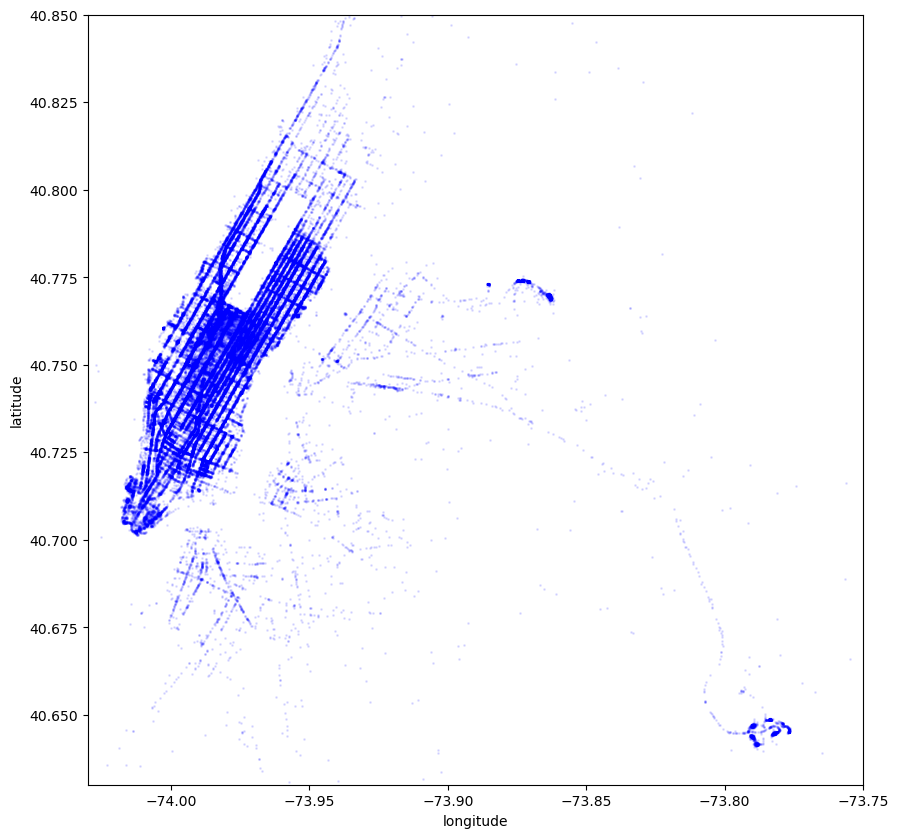

In [17]:
# lets graph the density of pickups 


N = 100000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.figure(figsize=(10,10))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

Text(0, 0.5, 'Days from initial ride')

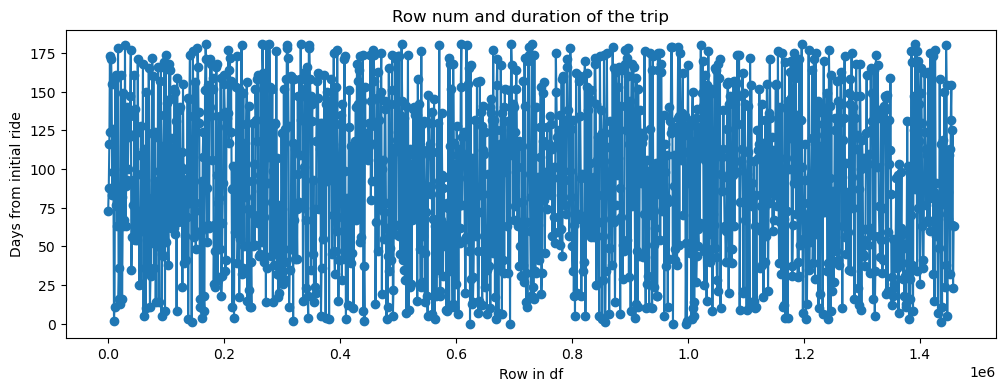

In [20]:
# lets test if the data is random in the train sample

plt.figure(figsize=(12,4))
days_since_min_ride = (train['pickup_datetime'] - train['pickup_datetime'].min()).apply(lambda x: x.total_seconds() // (60*60*24))
plt.plot(days_since_min_ride[::1000], 'o-')
plt.title('Row num and duration of the trip')
plt.xlabel('Row in df')
plt.ylabel('Days from initial ride')

 Looks pretty random 

We can probably assume that the trip duration is closely relied on the distance travelled, lets compute it. __annotations__
- we can take the simple distance from point A to point B, but this would be a bad estimation due to the fact that card drive on roads instead of flying 
- we can take the 'harvesine distance' which is a distance between two dots on a sphere, but this still implies a lot of imperfections 
- best option would be the 'manhattan distance' 

In [21]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
train.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)


Lets take a look at computation perfomance in pandas 

In [24]:
train1 = train.copy()

In [26]:
%%timeit

#forloop perfomance 

for i in range(100):
    train1[i, 'distance_haversine'] = haversine_array(train1['pickup_latitude'].iloc[i], 
                                                      train1['pickup_longitude'].iloc[i], 
                                                      train1['dropoff_latitude'].iloc[i], 
                                                      train1['dropoff_longitude'].iloc[i])

<magic-timeit>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<magic-timeit>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<magic-timeit>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<magic-timeit>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

The slowest run took 8.21 times longer than the fastest. This could mean that an intermediate result is being cached.
168 ms ± 176 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%%timeit
#lambda perfomance 

train1.iloc[:5000, :].apply(lambda x: 
                            haversine_array(x['pickup_latitude'], 
                                            x['pickup_longitude'], 
                                            x['dropoff_latitude'], 
                                            x['dropoff_longitude']),
                            axis=1)

288 ms ± 69.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%%timeit
#vectorized computation perfomance 
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

94.3 ms ± 35.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
